In [64]:
# importing needy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
ri=pd.read_csv(r'E:\Downloads\Compressed\yg821jf8611_ri_statewide_2020_04_01.csv\ri_statewide_2020_04_01.csv')
ri.head(3)

C:\Users\ahmed\anaconda3\anaconda4\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [66]:
#display null values
display(ri.isnull().sum())
display(ri.shape)

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

(509681, 31)

In [67]:
#drop unnecessary data and any rows with no gender
ri.drop(['raw_SearchResultThree','raw_SearchResultTwo'],axis='columns',inplace=True)
ri.dropna(subset=['subject_sex'],inplace=True)
ri.shape

(480584, 29)

In [68]:
print(ri.isnull().sum())

raw_row_number              0
date                        0
time                        0
zone                        0
subject_race                0
subject_sex                 0
department_id               0
type                        0
arrest_made                 0
citation_issued             0
warning_issued              0
outcome                  6763
contraband_found       462822
contraband_drugs       464596
contraband_weapons     468789
contraband_alcohol     479367
contraband_other       462822
frisk_performed             0
search_conducted            0
search_basis           462822
reason_for_search      462822
reason_for_stop             0
vehicle_make           162525
vehicle_model          250553
raw_BasisForStop            0
raw_OperatorRace            0
raw_OperatorSex             0
raw_ResultOfStop            0
raw_SearchResultOne    462822
dtype: int64


In [69]:
#settting datetime index to facilitate indexing
combined=ri.date.str.cat(ri.time,sep=' ')
ri['date_time']=pd.to_datetime(combined)
ri.set_index('date_time',inplace=True)
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,search_basis,reason_for_search,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne
date_time,,,,,,,,,,,,,,,,,,,,,
2005-11-22 11:15:00,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,Speeding,NaN,NaN,SP,W,M,M,NaN
2005-10-01 12:20:00,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,Speeding,NaN,NaN,SP,W,M,M,NaN
2005-10-01 12:30:00,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,Speeding,NaN,NaN,SP,W,F,M,NaN
2005-10-01 12:50:00,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,Speeding,NaN,NaN,SP,W,M,M,NaN
2005-10-01 13:10:00,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,Speeding,NaN,NaN,SP,W,F,M,NaN


In [70]:
# DO genders commit different violations
ri.reason_for_stop.value_counts(normalize=True)

Speeding                            0.559186
Other Traffic Violation             0.187747
Equipment/Inspection Violation      0.127449
Registration Violation              0.041262
Seatbelt Violation                  0.033967
Special Detail/Directed Patrol      0.028386
Call for Service                    0.015824
Violation of City/Town Ordinance    0.002156
Motorist Assist/Courtesy            0.002058
APB                                 0.001009
Suspicious Person                   0.000712
Warrant                             0.000243
Name: reason_for_stop, dtype: float64

In [71]:
female=ri[ri.subject_sex=='female']
male=ri[ri.subject_sex=='male']
print(male.reason_for_stop.value_counts(normalize=True))
print('\n')
print(female.reason_for_stop.value_counts(normalize=True))


Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB                                 0.001076
Suspicious Person                   0.000767
Warrant                             0.000258
Name: reason_for_stop, dtype: float64


Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB            

In [72]:
# another way
ri.groupby('subject_sex')['reason_for_stop'].value_counts(normalize=True)

subject_sex  reason_for_stop                 
female       Speeding                            0.657308
             Other Traffic Violation             0.136581
             Equipment/Inspection Violation      0.107055
             Registration Violation              0.043077
             Seatbelt Violation                  0.027071
             Call for Service                    0.018057
             Special Detail/Directed Patrol      0.005071
             Motorist Assist/Courtesy            0.002532
             Violation of City/Town Ordinance    0.001647
             APB                                 0.000831
             Suspicious Person                   0.000564
             Warrant                             0.000206
male         Speeding                            0.522364
             Other Traffic Violation             0.206948
             Equipment/Inspection Violation      0.135102
             Registration Violation              0.040581
             Special Detai

In [73]:
'''About two-thirds of female traffic stops are for speeding, 
whereas stops of males are more balanced among the six categories. 
This doesn't mean that females speed more often than males, however,
since we didn't take into account the number of stops or drivers.'''

"About two-thirds of female traffic stops are for speeding, \nwhereas stops of males are more balanced among the six categories. \nThis doesn't mean that females speed more often than males, however,\nsince we didn't take into account the number of stops or drivers."

In [74]:
# Does gender affect who gets ticket for speeding

In [75]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.subject_sex=='female')&(ri.reason_for_stop=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.subject_sex=='male')&(ri.reason_for_stop=='Speeding')]

# Compute the stop outcomes for female drivers
print(female_and_speeding.outcome.value_counts(normalize=True))
print('\n')
# Compute the stop outcomes for male drivers 
print(male_and_speeding.outcome.value_counts(normalize=True))

citation    0.954609
warning     0.039059
arrest      0.006332
Name: outcome, dtype: float64


citation    0.946763
warning     0.036167
arrest      0.017070
Name: outcome, dtype: float64


In [76]:
'''gender has no impact who gets a ticket for speeding'''

'gender has no impact who gets a ticket for speeding'

In [77]:
# Does gender affect who gets searched 
ri.search_conducted.unique()

array([False,  True])

In [78]:
#discover which gender is searched more 
ri.groupby('subject_sex').search_conducted.mean()

subject_sex
female    0.018751
male      0.043792
Name: search_conducted, dtype: float64

In [79]:
# discover which violation each gender is searched for
ri.groupby(['subject_sex','reason_for_stop']).search_conducted.mean()

subject_sex  reason_for_stop                 
female       APB                                 0.165138
             Call for Service                    0.042230
             Equipment/Inspection Violation      0.040245
             Motorist Assist/Courtesy            0.033133
             Other Traffic Violation             0.038021
             Registration Violation              0.054700
             Seatbelt Violation                  0.017746
             Special Detail/Directed Patrol      0.018045
             Speeding                            0.007738
             Suspicious Person                   0.216216
             Violation of City/Town Ordinance    0.060185
             Warrant                             0.148148
male         APB                                 0.255319
             Call for Service                    0.092419
             Equipment/Inspection Violation      0.070916
             Motorist Assist/Courtesy            0.089802
             Other Traffic

In [80]:
'''Male Driver are searched twice more than Females,
For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.'''

'Male Driver are searched twice more than Females,\nFor all types of violations, the search rate is higher for males than for females, disproving our hypothesis.'

In [81]:
 ri.frisk_performed.unique()

array([False, True], dtype=object)

In [82]:
#changing data type from object to boolean to aggregate
ri['frisk_performed']=ri.frisk_performed .astype('boolean')

In [83]:
ri.groupby('subject_sex').frisk_performed.mean()

subject_sex
female    0.008213
male      0.023594
Name: frisk_performed, dtype: float64

In [84]:
ri.groupby(['subject_sex','reason_for_stop']).frisk_performed.mean()

subject_sex  reason_for_stop                 
female       APB                                 0.055046
             Call for Service                    0.014358
             Equipment/Inspection Violation      0.018591
             Motorist Assist/Courtesy            0.021084
             Other Traffic Violation             0.017196
             Registration Violation              0.019295
             Seatbelt Violation                  0.006197
             Special Detail/Directed Patrol      0.007519
             Speeding                            0.003504
             Suspicious Person                   0.121622
             Violation of City/Town Ordinance    0.050926
             Warrant                             0.111111
male         APB                                 0.170213
             Call for Service                    0.043727
             Equipment/Inspection Violation      0.037640
             Motorist Assist/Courtesy            0.048706
             Other Traffic

In [85]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne'],
      dtype='object')

In [86]:
#Does gender affects who got searched beacouse of alcohol
ri.reason_for_search.value_counts(dropna=False)

NaN                                                         462822
Incident to Arrest                                            6998
Probable Cause                                                2063
Odor of Drugs/Alcohol                                         1872
Reasonable Suspicion                                          1141
                                                             ...  
Odor of Drugs/Alcohol|Inventory/Tow|Reasonable Suspicion         1
Probable Cause|Inventory/Tow|Incident to Arrest                  1
Plain View|Terry Frisk|Odor of Drugs/Alcohol                     1
Plain View|Reasonable Suspicion|Terry Frisk                      1
Terry Frisk|Reasonable Suspicion|Odor of Drugs/Alcohol           1
Name: reason_for_search, Length: 189, dtype: int64

In [87]:
ri['alcohol']=ri.reason_for_search.str.contains('Alcohol',na=False)
ri.alcohol.sum()

3254

In [88]:
searched=ri[ri.search_conducted==True]

display(searched.alcohol.mean())

0.18320009007994595

In [89]:
display(searched.groupby('subject_sex')['alcohol'].mean())

subject_sex
female    0.159414
male      0.187022
Name: alcohol, dtype: float64

In [90]:
'''The frisk rate is higher for males than for females, 
though we can't conclude that this difference is caused by the driver's gender.'''

"The frisk rate is higher for males than for females, \nthough we can't conclude that this difference is caused by the driver's gender."

In [91]:
ri['arrest_made']=ri.arrest_made.astype('bool')

In [92]:
ri.arrest_made.dtype

dtype('bool')

In [93]:
# Does time of the day affect the arrest rate
print(ri.arrest_made.mean())
print(ri.groupby(ri.index.hour)['arrest_made'].mean())
hourly_arrest_made=ri.groupby(ri.index.hour).arrest_made.mean()

0.03454755048024903
date_time
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: arrest_made, dtype: float64


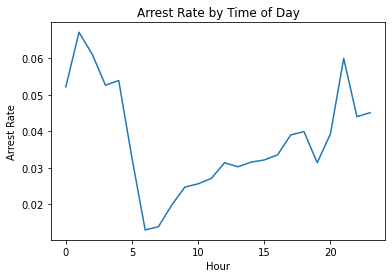

In [94]:
hourly_arrest_made.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

In [95]:
'''The arrest rate has a significant spike overnight, and then dips in the early morning hours.'''

'The arrest rate has a significant spike overnight, and then dips in the early morning hours.'

In [96]:
ri['drug_related']=ri.reason_for_search.str.contains('Drugs',na=False)
print(ri.drug_related.resample('A').mean())
annual_drug_related=ri.drug_related.resample('A').mean()

date_time
2005-12-31    0.005142
2006-12-31    0.003744
2007-12-31    0.004906
2008-12-31    0.004652
2009-12-31    0.008363
2010-12-31    0.007632
2011-12-31    0.008773
2012-12-31    0.008486
2013-12-31    0.008253
2014-12-31    0.008613
2015-12-31    0.005597
Freq: A-DEC, Name: drug_related, dtype: float64


<AxesSubplot:xlabel='date_time'>

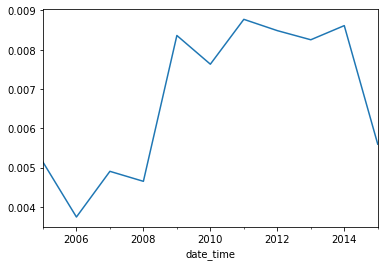

In [97]:
annual_drug_related.plot()

In [98]:
''' The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?'''

' The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?'

In [99]:
ri.zone.value_counts()

X4    125670
K3    108868
K2     97281
X3     89431
K1     46110
X1     13224
Name: zone, dtype: int64

In [100]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.zone,ri.reason_for_stop))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.zone,ri.reason_for_stop)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['K1':'K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['K1':'K3']

reason_for_stop  APB  Call for Service  Equipment/Inspection Violation  \
zone                                                                     
K1                32               281                            3786   
K2               101              1036                           11285   
K3               144              1227                           12959   
X1                 6               198                            1725   
X3                64              1328                           11520   
X4               138              3535                           19975   

reason_for_stop  Motorist Assist/Courtesy  Other Traffic Violation  \
zone                                                                 
K1                                     78                     7127   
K2                                    118                    16440   
K3                                    258                    16218   
X1                                     33                

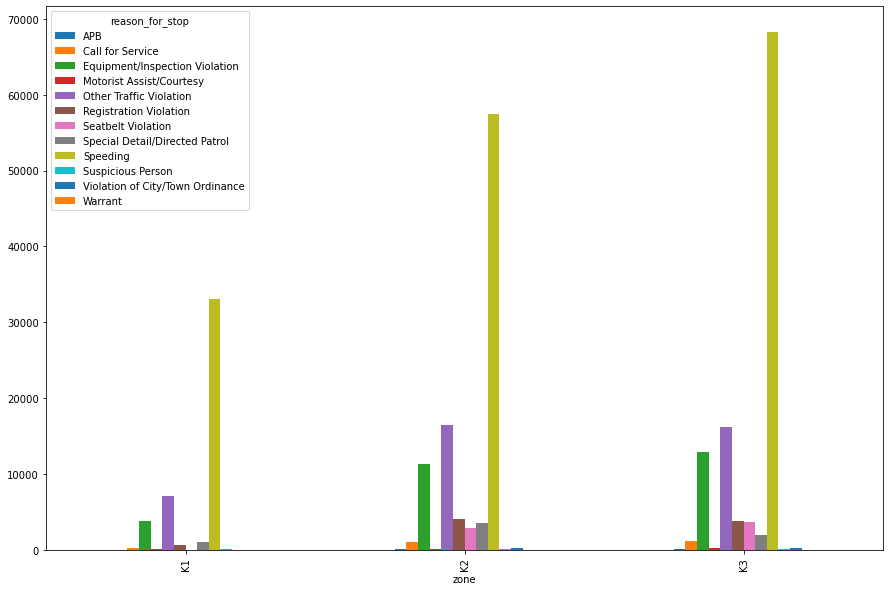

In [101]:
k_zones.plot(kind='bar',figsize=(15,10))

# Display the plot
plt.show()

In [102]:
'''The vast majority of traffic stops in all zones are for speeding, 
and Zones K2 and K3 are remarkably similar to one another in terms of violations.'''

'The vast majority of traffic stops in all zones are for speeding, \nand Zones K2 and K3 are remarkably similar to one another in terms of violations.'

In [103]:
import requests
r=requests.get('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')

In [104]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url='https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv'

# Save file locally
urlretrieve(url,'weather.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('weather.csv')
print(df.head())

       STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]


In [105]:
#Exploring weather dataset

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


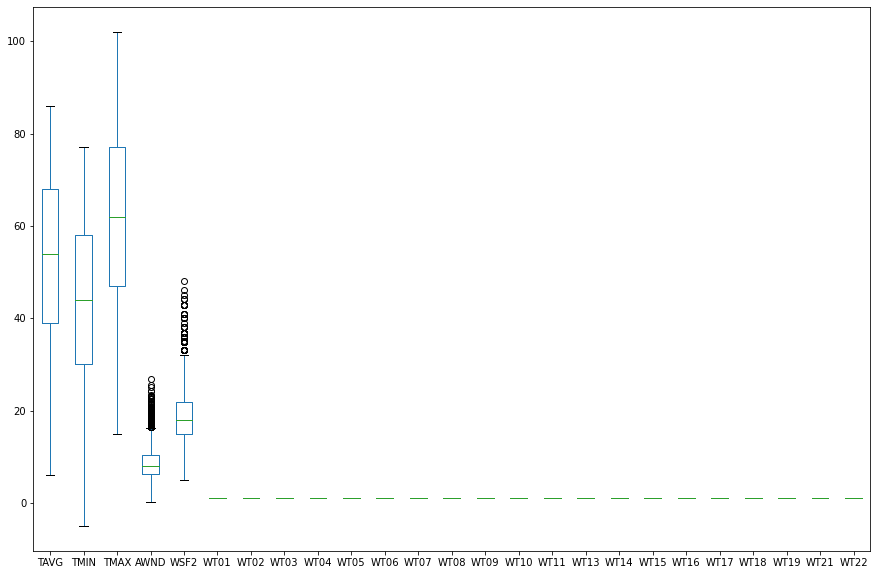

In [106]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather=pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
weather.plot(kind='box',figsize=(15,10))

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


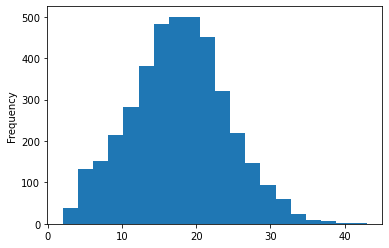

In [107]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF']=weather['TMAX']-weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist',bins=20)

# Display the plot
plt.show()


In [108]:
weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


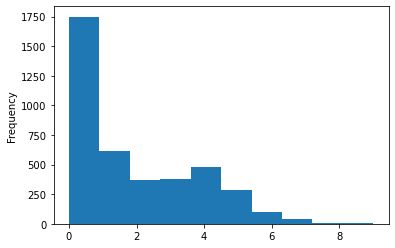

In [109]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT=weather.loc[:,'WT01':'WT22']
WT

# Calculate the sum of each row in 'WT'
weather['bad_conditions']=WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions']=weather.bad_conditions.fillna(0).astype(int)

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

In [110]:
'''It looks like many days didn't have any bad weather conditions,
and only a small portion of days had more than four bad weather conditions.'''

"It looks like many days didn't have any bad weather conditions,\nand only a small portion of days had more than four bad weather conditions."

In [111]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())


0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [112]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good','bad','worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [114]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)
# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

   index           date_time  raw_row_number        date      time zone  \
0      0 2005-11-22 11:15:00               1  2005-11-22  11:15:00   X3   
1      1 2005-10-01 12:20:00               2  2005-10-01  12:20:00   X3   
2      2 2005-10-01 12:30:00               3  2005-10-01  12:30:00   X3   
3      3 2005-10-01 12:50:00               4  2005-10-01  12:50:00   X3   
4      4 2005-10-01 13:10:00               5  2005-10-01  13:10:00   X3   

  subject_race subject_sex department_id       type  ...  reason_for_stop  \
0        white        male           200  vehicular  ...         Speeding   
1        white        male           200  vehicular  ...         Speeding   
2        white      female           200  vehicular  ...         Speeding   
3        white        male           200  vehicular  ...         Speeding   
4        white      female           200  vehicular  ...         Speeding   

  vehicle_make vehicle_model raw_BasisForStop raw_OperatorRace  \
0          NaN      

In [128]:
ri_weather=ri.merge(weather_rating, left_on='date', right_on='DATE', how='left')
ri_weather.head()

,index,date_time,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,...,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,alcohol,drug_related,DATE,rating
0,0,2005-11-22 11:15:00,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,...,NaN,SP,W,M,M,NaN,False,False,2005-11-22,bad
1,1,2005-10-01 12:20:00,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,...,NaN,SP,W,M,M,NaN,False,False,2005-10-01,good
2,2,2005-10-01 12:30:00,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,...,NaN,SP,W,F,M,NaN,False,False,2005-10-01,good
3,3,2005-10-01 12:50:00,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,...,NaN,SP,W,M,M,NaN,False,False,2005-10-01,good
4,4,2005-10-01 13:10:00,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,...,NaN,SP,W,F,M,NaN,False,False,2005-10-01,good


In [130]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('date_time', inplace=True)

In [ ]:
'''Does weather affect the arrest rate''' 

In [132]:
ri_weather.isnull().sum()

index                       0
raw_row_number              0
date                        0
time                        0
zone                        0
subject_race                0
subject_sex                 0
department_id               0
type                        0
arrest_made                 0
citation_issued             0
warning_issued              0
outcome                  6763
contraband_found       462822
contraband_drugs       464596
contraband_weapons     468789
contraband_alcohol     479367
contraband_other       462822
frisk_performed             0
search_conducted            0
search_basis           462822
reason_for_search      462822
reason_for_stop             0
vehicle_make           162525
vehicle_model          250553
raw_BasisForStop            0
raw_OperatorRace            0
raw_OperatorSex             0
raw_ResultOfStop            0
raw_SearchResultOne    462822
alcohol                     0
drug_related                0
DATE                        0
rating    

<AxesSubplot:xlabel='rating'>

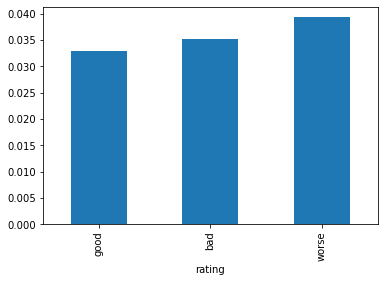

In [146]:
arrest_rate=ri_weather.groupby('rating').arrest_made.mean()
arrest_rate.plot(kind='bar')

In [148]:
ri_weather.groupby(['rating','reason_for_stop']).arrest_made.mean()

rating  reason_for_stop                 
good    APB                                 0.239496
        Call for Service                    0.175439
        Equipment/Inspection Violation      0.056484
        Motorist Assist/Courtesy            0.116009
        Other Traffic Violation             0.055621
        Registration Violation              0.076831
        Seatbelt Violation                  0.025503
        Special Detail/Directed Patrol      0.009456
        Speeding                            0.013214
        Suspicious Person                   0.229299
        Violation of City/Town Ordinance    0.058065
        Warrant                             0.694915
bad     APB                                 0.284314
        Call for Service                    0.187429
        Equipment/Inspection Violation      0.059704
        Motorist Assist/Courtesy            0.103604
        Other Traffic Violation             0.057976
        Registration Violation              0.092749
     

In [150]:
# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='reason_for_stop', columns='rating', values='arrest_made'))

rating                                good       bad     worse
reason_for_stop                                               
APB                               0.239496  0.284314  0.372093
Call for Service                  0.175439  0.187429  0.177381
Equipment/Inspection Violation    0.056484  0.059704  0.094373
Motorist Assist/Courtesy          0.116009  0.103604  0.070175
Other Traffic Violation           0.055621  0.057976  0.062249
Registration Violation            0.076831  0.092749  0.098673
Seatbelt Violation                0.025503  0.028845  0.000000
Special Detail/Directed Patrol    0.009456  0.009619  0.004739
Speeding                          0.013214  0.013368  0.016600
Suspicious Person                 0.229299  0.263158  0.181818
Violation of City/Town Ordinance  0.058065  0.048523  0.092784
Warrant                           0.694915  0.500000  0.400000


In [ ]:
'''The arrest rate increases slightly as the weather gets worse, 
This doesn't prove a causal link, but it's quite an interesting result!'''